# **Data Extraction**

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Import dataset
data = pd.read_csv('data.csv')


In [3]:
# Get the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26780 entries, 0 to 26779
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   symbol              26780 non-null  object 
 1   exchange            26780 non-null  object 
 2   date                26780 non-null  object 
 3   adjusted close      26780 non-null  float64
 4   option symbol       26780 non-null  object 
 5   expiration          26779 non-null  object 
 6   strike              26779 non-null  float64
 7   call/put            26779 non-null  object 
 8   style               26779 non-null  object 
 9   ask                 26779 non-null  float64
 10  bid                 26779 non-null  float64
 11  mean price          26779 non-null  float64
 12  iv                  26779 non-null  float64
 13  volume              26779 non-null  float64
 14  open interest       26779 non-null  float64
 15  stock price for iv  26779 non-null  float64
 16  *   

In [4]:
# Create a new dataframe from the dataset
df = pd.DataFrame(data)

In [5]:
# Check the dataframe
df.head()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00215000,07/30/2021,215.0,C,A,224.56,...,-1.0,0.0,0.0,438.97,NaN,0.0,0.0,0.0,0.0,0.0
1,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00215000,07/30/2021,215.0,P,A,0.01,...,-1.0,0.0,1401.0,438.97,NaN,0.0,0.0,0.0,0.0,0.0
2,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00220000,07/30/2021,220.0,C,A,219.56,...,-1.0,0.0,1.0,438.97,NaN,0.0,0.0,0.0,0.0,0.0
3,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00220000,07/30/2021,220.0,P,A,0.01,...,-1.0,50.0,328.0,438.97,NaN,0.0,0.0,0.0,0.0,0.0
4,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00225000,07/30/2021,225.0,C,A,214.56,...,-1.0,0.0,0.0,438.97,NaN,0.0,0.0,0.0,0.0,0.0


In [6]:
# Get the description of the data in the dataframe
df.describe()

,adjusted close,strike,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
count,26780.000000,26779.000000,26779.000000,26779.000000,26779.000000,26779.000000,26779.000000,26779.000000,26779.000000,26779.000000,26779.000000,26779.000000,26779.000000,26779.000000
mean,439.421541,403.709026,38.544683,37.876703,38.209538,0.228780,431.953098,1847.899511,439.357331,0.102184,0.424039,0.005971,-0.045160,-0.040599
std,1.000500,88.545751,57.916310,57.288980,57.601601,0.241398,5320.763725,6654.635893,0.638051,0.618641,0.503953,0.009674,0.041086,1.510170
min,438.510000,25.000000,0.010000,0.000000,0.000000,-1.000000,0.000000,0.000000,438.620000,-1.000000,0.000000,0.000000,-0.560042,-15.350967
25%,438.510000,359.000000,1.110000,1.030000,1.075000,0.132789,0.000000,2.000000,438.970000,-0.222063,0.044293,0.000672,-0.063111,-0.083228
50%,438.830000,417.000000,13.750000,13.220000,13.460000,0.205274,0.000000,120.000000,438.970000,0.000000,0.222178,0.002774,-0.037964,0.000000
75%,440.650000,458.000000,47.075000,46.180000,46.615000,0.311458,20.000000,1014.000000,440.130000,0.743345,0.616758,0.006837,-0.013723,0.247962
max,440.650000,655.000000,415.740000,414.400000,415.070000,1.741315,332808.000000,169905.000000,440.130000,1.000000,2.666904,0.148015,0.000000,5.556179


# **Data Validation and Cleansing**

In [7]:
# Check how many unique values are there in Symbol column
print(df.symbol.unique())

['SPY']


In [8]:
# Symbol column has only value 'SPY' which is not useful for the further analysis, So we eliminate the column from the datafarme
df.drop('symbol', inplace=True, axis=1)

In [9]:
# Check how many unique values are there in Exchange column
print(df.exchange.unique())

['NYSEArca']


In [10]:
# Exchange column has only value 'NYSEArca' which is not useful for the further analysis, So we eliminate the column from the datafarme
df.drop('exchange', inplace=True, axis=1)

In [11]:
# We drop the 'style' and '*' columns which are don't have any uniqe value and not useful for the further analysis
df.drop('style', inplace=True, axis=1)
df.drop('*', inplace=True, axis=1)

In [12]:
# We drop the option symbol as well, because it is a combined field which has the value of symbol, date,call/put and strike and we have those values in separate column in the dataframe
df.drop('option symbol', inplace=True, axis=1)

In [13]:
# Check whether all the unwanted columns were removed
print(df.keys())

Index(['date', 'adjusted close', 'expiration', 'strike', 'call/put', 'ask',
       'bid', 'mean price', 'iv', 'volume', 'open interest',
       'stock price for iv', 'delta', 'vega', 'gamma', 'theta', 'rho'],
      dtype='object')


In [14]:
# Check the datatype of each column 
df.dtypes

date                   object
adjusted close        float64
expiration             object
strike                float64
call/put               object
ask                   float64
bid                   float64
mean price            float64
iv                    float64
volume                float64
open interest         float64
stock price for iv    float64
delta                 float64
vega                  float64
gamma                 float64
theta                 float64
rho                   float64
dtype: object

In [15]:
# Change the datatype of 'date' and 'expiration' from object to datetime
df["date"] = pd.to_datetime(df["date"])
df["expiration"] = pd.to_datetime(df["expiration"])

In [16]:
# Change the datatype of 'call/put' from object to int
df['call/put'] = df['call/put'].map({'C': 1, 'P': 0})        

In [17]:
df

,date,adjusted close,expiration,strike,call/put,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
0,2021-07-30,438.51,2021-07-30,215.0,1.0,224.56,223.35,223.955,-1.000000,0.0,0.0,438.97,0.000000,0.000000,0.000000,0.000000,0.000000
1,2021-07-30,438.51,2021-07-30,215.0,0.0,0.01,0.00,0.000,-1.000000,0.0,1401.0,438.97,0.000000,0.000000,0.000000,0.000000,0.000000
2,2021-07-30,438.51,2021-07-30,220.0,1.0,219.56,218.35,218.955,-1.000000,0.0,1.0,438.97,0.000000,0.000000,0.000000,0.000000,0.000000
3,2021-07-30,438.51,2021-07-30,220.0,0.0,0.01,0.00,0.000,-1.000000,50.0,328.0,438.97,0.000000,0.000000,0.000000,0.000000,0.000000
4,2021-07-30,438.51,2021-07-30,225.0,1.0,214.56,213.35,213.955,-1.000000,0.0,0.0,438.97,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26775,2021-07-28,438.83,2021-10-15,525.0,0.0,87.73,87.35,87.540,0.173580,0.0,0.0,438.62,-0.984042,0.069914,0.000967,-0.020129,-1.123662
26776,2021-07-28,438.83,2021-10-15,530.0,1.0,0.03,0.02,0.025,0.147034,0.0,118.0,438.62,0.002826,0.017688,0.000289,-0.001609,0.002629
26777,2021-07-28,438.83,2021-10-15,530.0,0.0,92.70,92.37,92.535,0.180737,0.0,0.0,438.62,-0.984770,0.066608,0.000885,-0.020060,-1.135165
26778,2021-07-28,438.83,2021-10-15,535.0,1.0,0.03,0.02,0.025,0.153468,0.0,236.0,438.62,0.002719,0.017080,0.000267,-0.001624,0.002527


In [18]:
# Change the datatype of 'theta' from object to float
df['theta'] = df['theta'].astype(float)

In [19]:
# Check the datatype of each column
df.dtypes

date                  datetime64[ns]
adjusted close               float64
expiration            datetime64[ns]
strike                       float64
call/put                     float64
ask                          float64
bid                          float64
mean price                   float64
iv                           float64
volume                       float64
open interest                float64
stock price for iv           float64
delta                        float64
vega                         float64
gamma                        float64
theta                        float64
rho                          float64
dtype: object

In [20]:
# Remove the record which has the NULL value

print("Before removes the rows that contains NULL values:" ,(len(df)))
df = df.dropna()
print("Aefore removes the rows that contains NULL values:",(len(df))) 




Before removes the rows that contains NULL values: 26780
Aefore removes the rows that contains NULL values: 26779


In [21]:
# Save the processed dataframe as a csv file
df.to_csv('data_set.csv', index=False)

# Data Aggregation

Date and the expiration attributes has to converted to date type object and also we have to find the different of days between this attribute and this value also has to be in the data set.

In [22]:
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])
df['expiration'] = pd.to_datetime(df['expiration'])
df['DateGap'] = df['expiration'].sub(df['date'], axis=0)

Converting the date to int

In [23]:
df['DateGap'] = df['DateGap'].dt.days

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26780 entries, 0 to 26779
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   symbol              26780 non-null  object        
 1   exchange            26780 non-null  object        
 2   date                26780 non-null  datetime64[ns]
 3   adjusted close      26780 non-null  float64       
 4   option symbol       26780 non-null  object        
 5   expiration          26779 non-null  datetime64[ns]
 6   strike              26779 non-null  float64       
 7   call/put            26779 non-null  object        
 8   style               26779 non-null  object        
 9   ask                 26779 non-null  float64       
 10  bid                 26779 non-null  float64       
 11  mean price          26779 non-null  float64       
 12  iv                  26779 non-null  float64       
 13  volume              26779 non-null  float64   

# Visualization

### Distribution of of the key values

<Axes: ylabel='Density'>

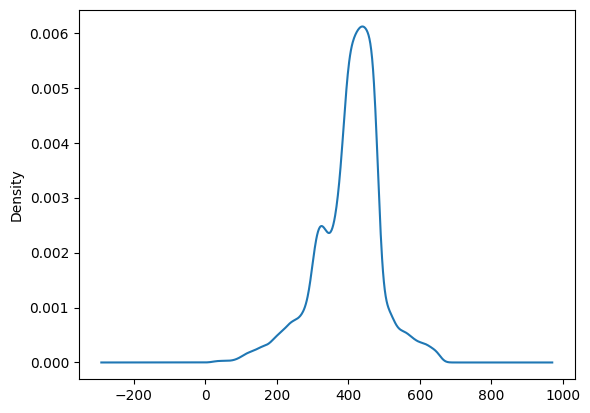

In [26]:
# Plot the distribution of strike
df['strike'].plot(kind='kde')

# Observed a normal distribution

<Axes: ylabel='Density'>

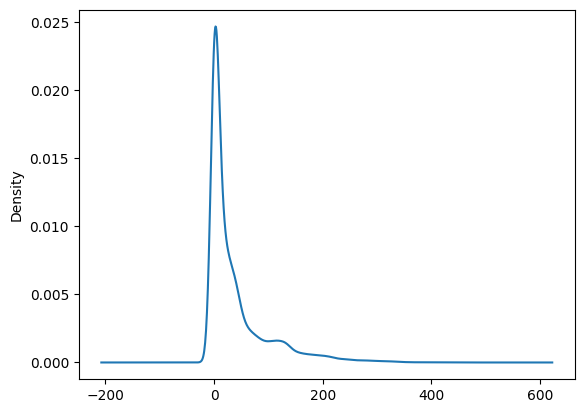

In [27]:
# Plot the distribution of mean price
df['mean price'].plot(kind='kde')

# Observed a right skewed distribution

<Axes: ylabel='Density'>

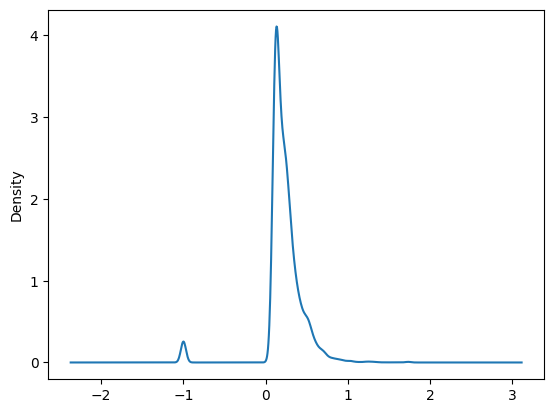

In [28]:
# Plot the distribution of iv
df['iv'].plot(kind='kde')

# Observed a right skewed distribution and also the outliers

<Axes: ylabel='Density'>

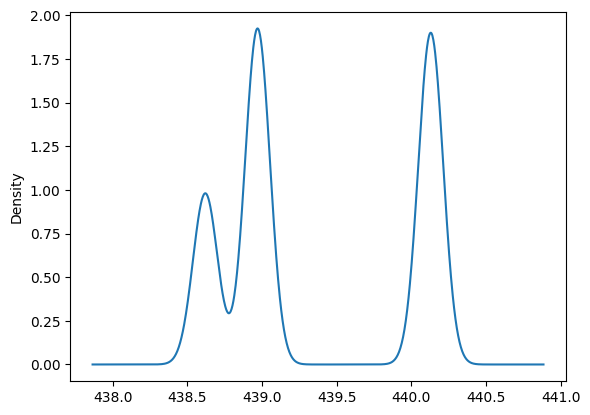

In [29]:
# Plot the distribution of stock price for iv
df['stock price for iv'].plot(kind='kde')

# Observed a  multimodal distribution 

<Axes: ylabel='Density'>

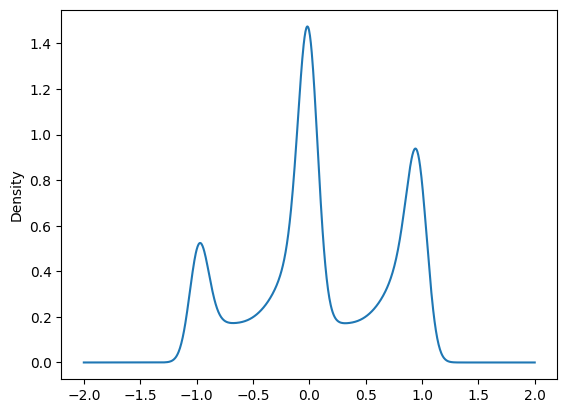

In [30]:
# Plot the distribution of stock price for delta
df['delta'].plot(kind='kde')

# Observed a  multimodal distribution 

<Axes: ylabel='Density'>

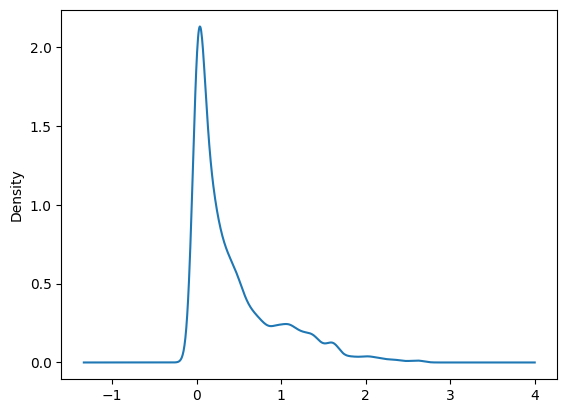

In [31]:
# Plot the distribution of stock price for vega
df['vega'].plot(kind='kde')

# Observed a right skewed distribution

### Line chart

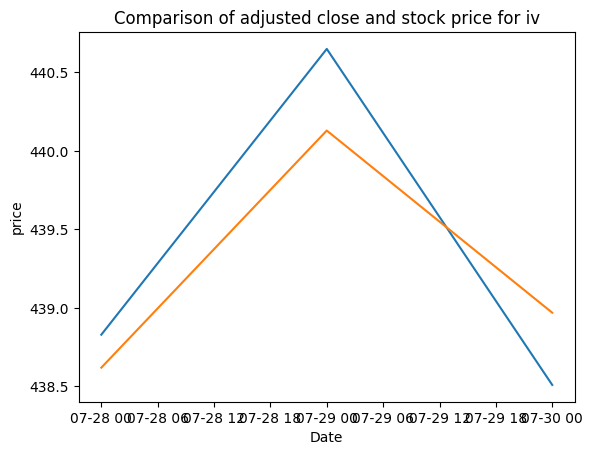

In [32]:
# Plot the line chart to identify the trend of adjusted close and stock price for iv for a one month time period

for col in ['adjusted close', 'stock price for iv']:
    plt.plot(df['date'], df[col])
    plt.title("Comparison of adjusted close and stock price for iv")
    plt.xlabel("Date")
    plt.ylabel("price")

Text(0, 0.5, 'volume')

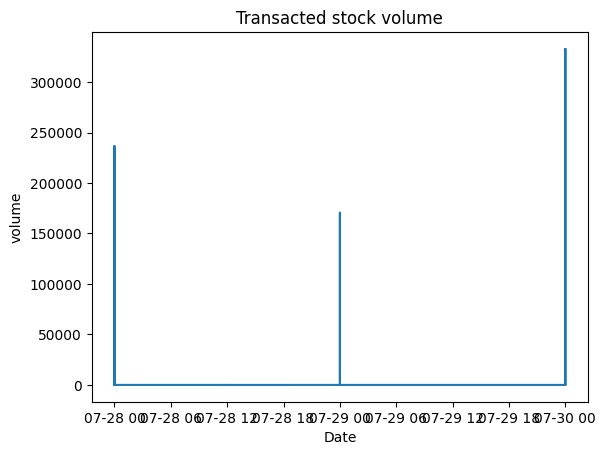

In [33]:
# Plot the chart

plt.plot(df['date'], df['volume'])
plt.title("Transacted stock volume")
plt.xlabel("Date")
plt.ylabel("volume")

# In some specific days there was high transaction and in some days the there was no transaction
# Observed a high fluctuation in the daily trasnaction volume

### Corrleation

In [34]:
# Divide the dataset into two parts based on the call/put type for the further analysis

df_call = df[df['call/put'] == 1]  # Dataset only with call records

df_put = df[df['call/put'] == 0]   # Dataset only with put records



<ipython-input-35-510cfc14c6ed>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = df_call.corr()
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


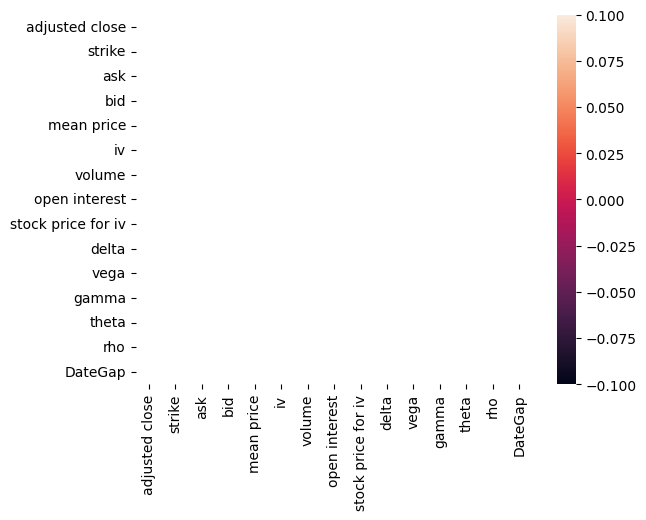

In [35]:
import seaborn as sns
from scipy import stats

# Caluculated the correlation matrix for the call dataset and visualize using heatmap

cormat = df_call.corr()
sns.heatmap(cormat);


#Stock price for iv and adjusted close have a strong high correlation.
#Apart from that, delta has a significant correlation with ask,bid and mean price. 
# And rho and vega also have a significant correlation

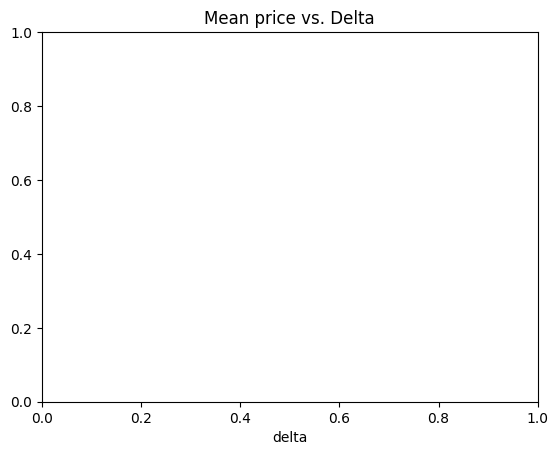

In [36]:
# Scatter plot for delta and mean price

ax = sns.scatterplot(x="delta", y="mean price", data=df_call)
ax.set_title("Mean price vs. Delta")
ax.set_xlabel("delta");

# Delta has a positive correlation with the mean price
# But the plot is unusual 
# Out liers are there in the dataset


<ipython-input-37-b655c33d33a3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = df_put.corr()
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


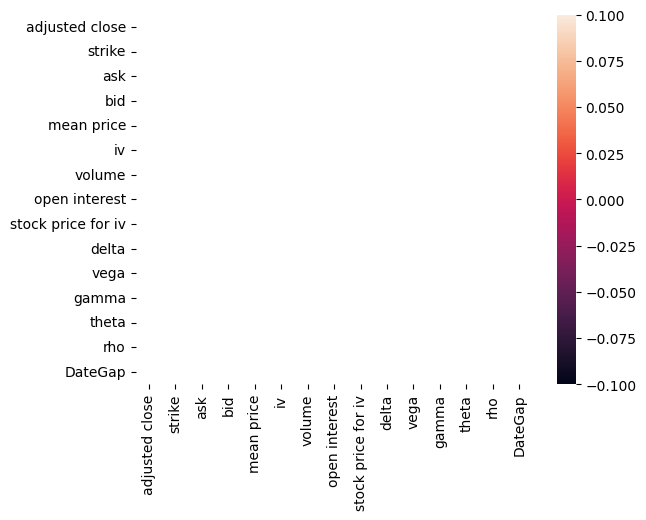

In [37]:
# Caluculated the correlation matrix for the put dataset and visualize using heatmap

cormat = df_put.corr()
sns.heatmap(cormat);

# Unable to find any significant correlation

### Scatter plot

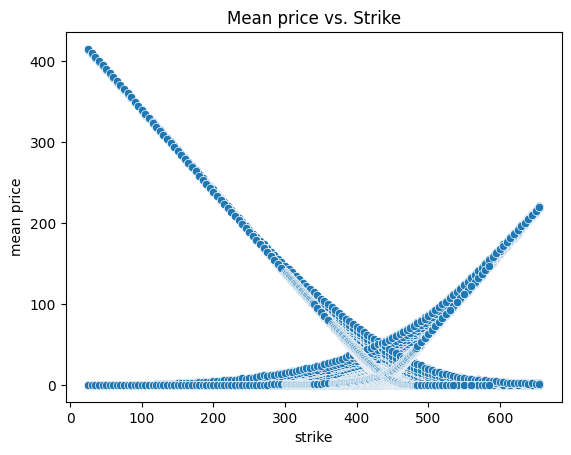

In [38]:
# # Scatter plot for strike and mean price for whole dataset

ax = sns.scatterplot(x="strike", y="mean price", data=df)
ax.set_title("Mean price vs. Strike")
ax.set_xlabel("strike");

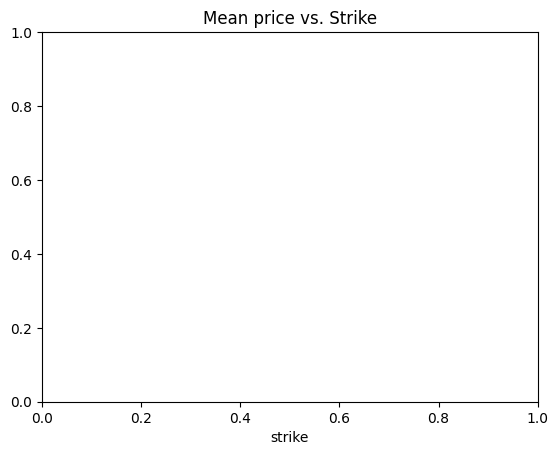

In [39]:
# Scatter plot for strike and mean price for call dataset

ax = sns.scatterplot(x="strike", y="mean price", data=df_call)
ax.set_title("Mean price vs. Strike")
ax.set_xlabel("strike");

In [40]:
# After analyzing the above scatter plot, we can conclude that when there is a call, the strike has a positive impact on the average price.

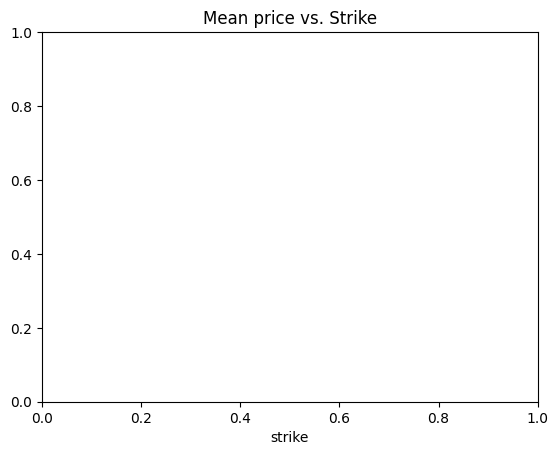

In [41]:
# Scatter plot for strike and mean price for pull dataset

ax = sns.scatterplot(x="strike", y="mean price", data=df_put)
ax.set_title("Mean price vs. Strike")
ax.set_xlabel("strike");

In [42]:
# After analyzing the above scatter plot, we can conclude that when there is a put, the strike has a negative impact on the average price.

# Analysis

### Predict the strike based on other features (without date)

In [54]:
#dropping date column

data = pd.read_csv('data_set.csv')

data = data.drop('date', axis=1)
data.head()


#dropping expiration column
data = data.drop('expiration', axis=1)
data.head()



,adjusted close,strike,call/put,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
0,438.51,215.0,1.0,224.56,223.35,223.955,-1.0,0.0,0.0,438.97,0.0,0.0,0.0,0.0,0.0
1,438.51,215.0,0.0,0.01,0.00,0.000,-1.0,0.0,1401.0,438.97,0.0,0.0,0.0,0.0,0.0
2,438.51,220.0,1.0,219.56,218.35,218.955,-1.0,0.0,1.0,438.97,0.0,0.0,0.0,0.0,0.0
3,438.51,220.0,0.0,0.01,0.00,0.000,-1.0,50.0,328.0,438.97,0.0,0.0,0.0,0.0,0.0
4,438.51,225.0,1.0,214.56,213.35,213.955,-1.0,0.0,0.0,438.97,0.0,0.0,0.0,0.0,0.0


In [55]:
#feature selection
X = data.drop('strike', axis=1)

#Target variable selection
y = data['strike']
y.head()



0    215.0
1    215.0
2    220.0
3    220.0
4    225.0
Name: strike, dtype: float64

In [56]:
# data splitting into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)




In [57]:
#fitting the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)




LinearRegression()

In [58]:
#predict and evaluate
model.score(X_train, y_train)

0.7725082558308697

In [59]:
model.score(X_test, y_test)

0.776469102313316

In [60]:
y_pred =model.predict(X_test)

In [61]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

27.597085637515438

# Utilization of Analysis Result

The result of the Analysis found mainly from different type of analysis such as:-
1. Descriptive Analysis 
2. Prdeictive Analysis


1. Descriptive Analysis
The result of the desriptive analysis is given above in the section of the visualization along with result as common. The result could be better understood with the plot and graph represented in the visualization part. The main key patterns were able to identify after the separation of the call and put as different column in the dataset.

2.Predictive Analysis

After the cleaning of dataset we as a team decided to go with the plan given below.
The total cleaned dataset is received finally as a team we decided to try this multivariate time series to find the strike attribute for the testing data. Multi variate time series is used as the data is influenced with date type attributes.

But due to the lack of domain knowledge and less expertise in the area we were able to the analysis what we have done in the Analysis section. This analysis can be considered as predictive analaysis.

The result of the Predicitve Analysis is given above in the section of Analysis. In this analysis we are trying to predict the strike rate using the linear regression. Due to the complication of having the date attibute in the dataset for the linear regression we decided to remove and try to do the prediction. The predicted score or the model score for the analysis is 77%.

The score for the test and train data set we were able to get around the same percentage of result using the linear regression analysis.

To validate our analysis we further as a team tried to identify the mean absolute error of the result. The mean absolute error is 27.